In [169]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr

In [170]:
'''This function reads 2013_-_2014_School_Quality_Reports_Results_for_High_Schools.csv and 
returns a dataframe with the names of the high schools and various ways in which to measure its quality. '''

def getSchoolQualityData():
    quality = pd.read_csv("2013_-_2014_School_Quality_Reports_Results_for_High_Schools.csv", usecols = [1, 18, 19, 26, 27, 28, 35])
    quality['School Name'] = quality['School Name'].str.upper()  #Match the values in this column to the values in the Public_Schools.csv data
    quality = quality.rename(columns = {'Quality Review: How interesting and challenging is the curriculum?':'Curriculum', 
                                        'Quality Review: How effective is the teaching and learning?':'Learning',
                                        'Quality Review: How well does the school assess what students are learning?': 'Assessment', 
                                       }) 
    #To make the Quality Reviews numerical values
    for col in quality.columns[3:6]:
        for i in range(0, len(quality)):
            if quality[col][i] == 'Proficient':
                quality[col][i] = 3
            elif quality[col][i] == 'Well Developed':
                quality[col][i] = 2
            elif quality[col][i] == 'Developing':
                quality[col][i] = 1
    return quality
getSchoolQualityData()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

,School Name,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Curriculum,Learning,Assessment,Average SAT Score
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2.17,2.07,3,1,3,1131.0
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2.23,2.26,3,3,3,1176.0
2,EAST SIDE COMMUNITY SCHOOL,2.66,2.58,NaN,NaN,NaN,1311.0
3,MARTA VALLE HIGH SCHOOL,2.34,2.15,1,1,1,1150.0
4,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",3.48,3.49,2,3,3,1773.0
5,BARD HIGH SCHOOL EARLY COLLEGE,3.70,3.64,2,2,3,1963.0
6,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,2.30,2.17,3,3,3,1212.0
7,THE URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGE...,2.39,2.23,NaN,NaN,NaN,NaN
8,STEPHEN T. MATHER BUILDING ARTS & CRAFTSMANSHI...,2.34,2.20,NaN,NaN,NaN,NaN
9,FOOD AND FINANCE HIGH SCHOOL,2.48,2.32,NaN,NaN,NaN,1146.0


In [171]:
'''This function reads Public_Schools.csv and merges it with the school quality data to return
a dataframe with the locations of each school and their quality'''
def getSchoolData(): 
    schools = pd.read_csv("Public_Schools.csv", usecols = [3, 4, 5, 6, 7, 8])#, index_col = 'NAME')
    quality = getSchoolQualityData()
    data = pd.merge(schools, quality, how = 'inner', left_on = 'NAME', right_on = 'School Name')
    data = data.drop(['School Name'], axis = 1)
    return data
getSchoolData()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Curriculum,Learning,Assessment,Average SAT Score
0,360012302863,RICHMOND HILL HIGH SCHOOL,89-30 114TH ST,RICHMOND HILL,NY,11418,2.32,2.21,1,3,1,1186.0
1,130057001873,RICHMOND HILL HIGH SCHOOL,1 WILDCAT DR,RICHMOND HILL,GA,31324,2.32,2.21,1,3,1,1186.0
2,360004204466,BRONX PREPARATORY CHARTER SCHOOL,3872 3RD AVE,BRONX,NY,10457,2.48,2.44,NaN,NaN,NaN,1271.0
3,120156004035,BAYSIDE HIGH SCHOOL,14405 49TH ST N,CLEARWATER,FL,33762,2.83,2.77,NaN,NaN,NaN,1511.0
4,120015003293,BAYSIDE HIGH SCHOOL,1901 DEGROODT RD SW,PALM BAY,FL,32908,2.83,2.77,NaN,NaN,NaN,1511.0
5,360009901917,BAYSIDE HIGH SCHOOL,32-24 CORP KENNEDY ST,BAYSIDE,NY,11361,2.83,2.77,NaN,NaN,NaN,1511.0
6,360008401338,HEALTH OPPORTUNITIES HIGH SCHOOL,350 GERARD AVE,BRONX,NY,10451,2.18,2.14,3,1,3,1127.0
7,360007605621,BARD HIGH SCHOOL EARLY COLLEGE,525 E HOUSTON ST,NEW YORK,NY,10002,3.70,3.64,2,2,3,1963.0
8,240009001735,BARD HIGH SCHOOL EARLY COLLEGE,1101 N. WOLFE STREET,BALTIMORE,MD,21212,3.70,3.64,2,2,3,1963.0
9,360008100590,CHOIR ACADEMY OF HARLEM,2005 MADISON AVE,NEW YORK,NY,10035,2.22,2.04,3,3,3,NaN


In [172]:
'''This function merges the housing prices data with the high school data to return
a dataframe with the quality of schools and the housing prices in a region'''
def getFinalData():
    schools = getSchoolData()
    housing = pd.read_csv("Zip_Zhvi_AllHomes.csv")
    housing2 = pd.DataFrame()
    housing2['RegionName'] = housing['RegionName']
    #Use only 2014 housing price data. 
    for col in housing.columns:
        if '2014' in str(col):
            housing2[col] = housing[col]
    #Calculate the mean housing price in 2014, across all 12 months. 
    housing2['Average 2014 Prices'] = housing2.mean(axis = 1)
    housing2 = housing2[['RegionName', 'Average 2014 Prices']]
    data = pd.merge(schools, housing2, how = 'inner', left_on = 'ZIP', right_on = 'RegionName')
    data = data.drop(['RegionName'], axis=1)
    data = data.drop_duplicates(subset = 'ADDRESS') #Drop duplicate entries of the same schools. 
    return data
getFinalData()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Curriculum,Learning,Assessment,Average SAT Score,Average 2014 Prices
0,360012302863,RICHMOND HILL HIGH SCHOOL,89-30 114TH ST,RICHMOND HILL,NY,11418,2.32,2.21,1,3,1,1186.0,3.850120e+05
1,130057001873,RICHMOND HILL HIGH SCHOOL,1 WILDCAT DR,RICHMOND HILL,GA,31324,2.32,2.21,1,3,1,1186.0,2.048224e+05
2,360004204466,BRONX PREPARATORY CHARTER SCHOOL,3872 3RD AVE,BRONX,NY,10457,2.48,2.44,NaN,NaN,NaN,1271.0,1.437893e+05
3,360008605670,EAGLE ACADEMY FOR YOUNG MEN,4143 3RD AVE,BRONX,NY,10457,2.25,2.21,3,3,3,1189.0,1.437893e+05
4,360008605882,DREAMYARD PREPARATORY SCHOOL,240 E 172ND ST,BRONX,NY,10457,2.20,2.04,3,1,3,1091.0,1.437893e+05
7,360008605793,MOTT HALL BRONX HIGH SCHOOL,1595 BATHGATE AVE,BRONX,NY,10457,2.26,2.24,3,1,3,1093.0,1.437893e+05
8,360008605795,LEADERSHIP INSTITUTE,1701 FULTON AVE,BRONX,NY,10457,2.03,1.93,3,3,3,1013.0,1.437893e+05
9,360008600795,BRONX LEADERSHIP ACADEMY HIGH SCHOOL,1710 WEBSTER AVE,BRONX,NY,10457,2.19,2.12,3,3,3,1173.0,1.437893e+05
10,360008705796,THEATRE ARTS PRODUCTION COMPANY SCHOOL,2225 WEBSTER AVE,BRONX,NY,10457,2.45,2.23,3,1,3,1213.0,1.437893e+05
11,120156004035,BAYSIDE HIGH SCHOOL,14405 49TH ST N,CLEARWATER,FL,33762,2.83,2.77,NaN,NaN,NaN,1511.0,1.675890e+05


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

There is enough evidence to reject the null hypothesis: There is no correlation between housing prices and quality of local high schools.


(0.22496189501477015, 0.001524101177718214)

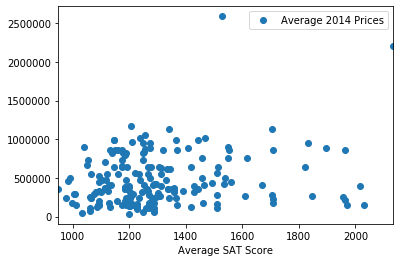

In [175]:
'''This function finds the correlation and the significance of that correlation between 
the school quality (measured by average SAT score) and housing prices. The significance value (p-value) is used 
to see if there is enough evidence to reject the null hypothesis: There is no correlation between housing prices and quality of local high schools. '''
def findCorr():
    data = getFinalData()
    data = data[['Average 2014 Prices','Average SAT Score' ]].dropna()
    housingPrices = data['Average 2014 Prices']
    sat = data['Average SAT Score']
    corr, p = pearsonr(sat, housingPrices)
    if p < 0.05: 
        print("There is enough evidence to reject the null hypothesis: There is no correlation between housing prices and quality of local high schools.")
    else: 
        print("There is not enough evidence to reject the null hypothesis: There is no correlation between housing prices and quality of local high school.")
    data.plot(x='Average SAT Score', y='Average 2014 Prices', style='o')
    return corr, p
findCorr()
